# **Deriving an Integral Fitting Method**

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

## **1. Set the Coefficients and Plot Spalding's Function (Dimensionless Foam)**

In [2]:
E = 5.0
kappa = 0.41
up = np.linspace(0, 30, 100)

yp = up + 1/E*(np.exp(kappa*up) - 1 - kappa*up - (1/2)*(kappa*up)**2 - (1/6)*(kappa*up)**3)

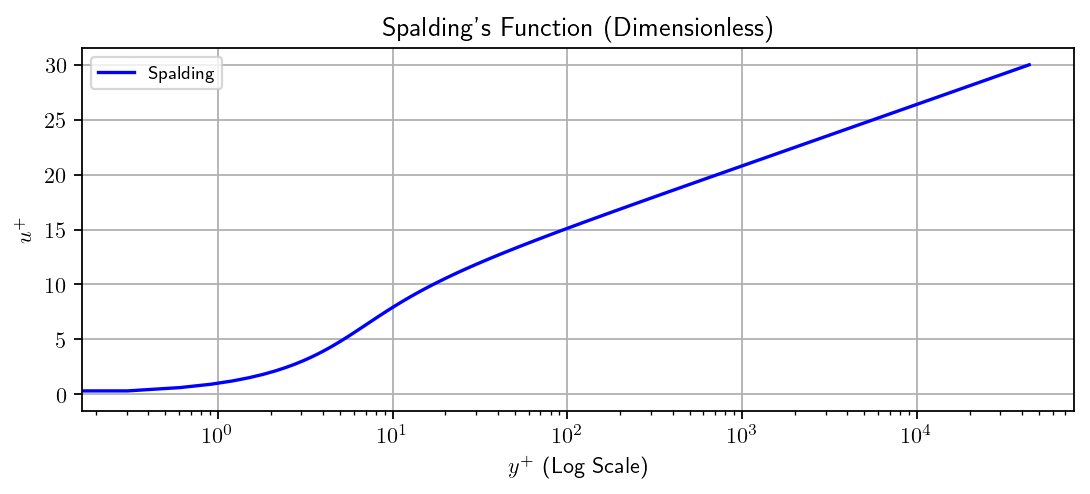

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax.set_xlabel(r"$y^+$ (Log Scale)")
ax.set_ylabel(r"$u^+$")
plt.xscale('log')
plt.title(r"Spalding's Function (Dimensionless)")
ax.plot(yp, up, color = "b", label = "Spalding")
ax.legend(fontsize = 8)

## **STEP 1 : FIND VELOCITY *u* BY USING NUMERICAL METHODS**

## **2. Functions**

1. '*velNewton*' : This function returns the velocity by using **Newton-Raphson's Method (Newton's Method)**.
2. '*velBisection*' : It returns the velocity by using **Bisection Method**.
3. '*y_vel*' : It returns the height of the first cell center normal to the wall '*y*' in order to plot *y-u* relation.

In [4]:
def velNewton(E, kappa, u, u_tau, y, nu):
    error = 1

    while(error > 1e-8):
        f = -(y*u_tau/nu) + u/u_tau + 1/E*(np.exp(kappa*u/u_tau) - 1 - kappa*u/u_tau - (1/2)*(kappa*u/u_tau)**2 - (1/6)*(kappa*u/u_tau)**3)
        df = 1/u_tau + 1/E*(kappa/u_tau*np.exp(kappa*u/u_tau) - kappa/u_tau - (kappa**2/u_tau**2)*u - 1/2*(kappa**3/u_tau**3)*(u**2))
    
        u_new = u - f/df
        error = abs(u_new - u)
        #print(error)
        u = u_new
    # When the process needs to be printed, we can uncomment this.
    #print("Newton : u = {}, u+ = {}, y+ = {}".format(u, u/u_tau, y*u_tau/nu))
    
    return u

def velBisection(E, kappa, u_tau, y, nu, a, b):    
    while((b - a)/2 > 1e-8):
        f_a = -(y*u_tau/nu) + a/u_tau + 1/E*(np.exp(kappa*a/u_tau) - 1 - kappa*a/u_tau - (1/2)*(kappa*a/u_tau)**2 - (1/6)*(kappa*a/u_tau)**3)
        f_b = -(y*u_tau/nu) + b/u_tau + 1/E*(np.exp(kappa*b/u_tau) - 1 - kappa*b/u_tau - (1/2)*(kappa*b/u_tau)**2 - (1/6)*(kappa*b/u_tau)**3)
        #print(f_a)
        c = (a + b)/2
        f_c = -(y*u_tau/nu) + c/u_tau + 1/E*(np.exp(kappa*c/u_tau) - 1 - kappa*c/u_tau - (1/2)*(kappa*c/u_tau)**2 - (1/6)*(kappa*c/u_tau)**3)
        if f_c == 0:
            break
            
        if np.sign(f_c) == np.sign(f_a):
            a = c
        else:
            b = c
    u = c
    # When the process needs to be printed, we can uncomment this.
    #print("Bisection : u = {}, u+ = {}, y+ = {}".format(u, u/u_tau, y*u_tau/nu))
    return u

def y_vel(E, kappa, u, u_tau, nu):
    y = (u/u_tau + 1/E*(np.exp(kappa*u/u_tau) - 1 - kappa*u/u_tau - (1/2)*(kappa*u/u_tau)**2 - (1/6)*(kappa*u/u_tau)**3))/(u_tau/nu)
    
    return y

## **3. Plot Spalding's Function for Various '*u_tau*' with Respect to *u* and *y***

The relation ```u_tau = sqrt(tau_w) = sqrt(nu*(du/dy))``` is applicable for incompressible flows. As seen below, the gradient *du/dy* increases as u_tau increases. Therefore, the behavior of **Spalding's Function** is reasonable.

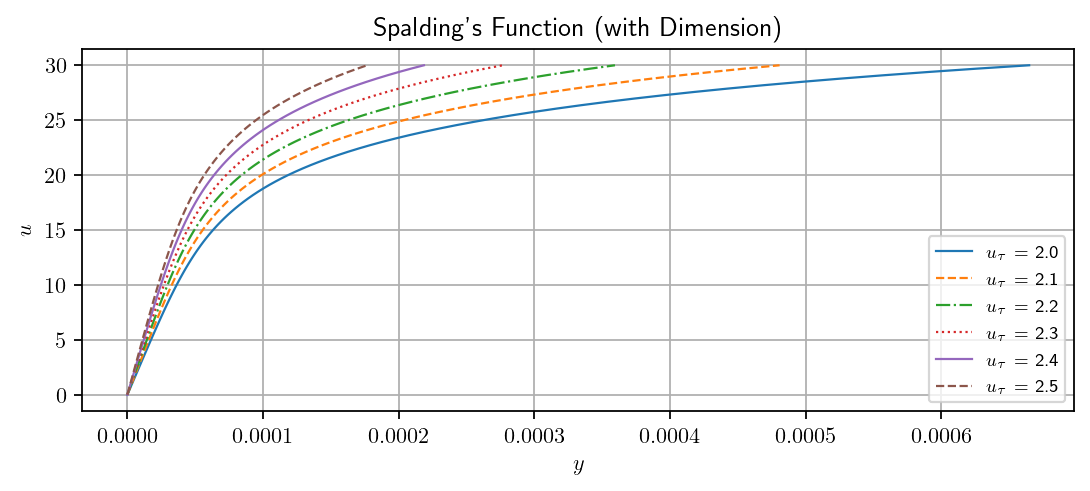

In [5]:
# nu from Turbulent Flat Plate case
nu = 1.388e-05
u_tau_list = [0.1*i+2 for i in range(6)]
u_list = np.linspace(0, 30, 100)

style = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
lw = 1.0
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.grid()
ax2.set_xlabel(r"$y$")
ax2.set_ylabel(r"$u$")
plt.title(r"Spalding's Function (with Dimension)")
for i in range(len(u_tau_list)):
    ax2.plot(y_vel(E, kappa, u_list, u_tau_list[i], nu), u_list, label = r'$u_\tau$ = {}'.format(u_tau_list[i]), ls = style[i], c = "C{:d}".format(i), lw = lw)
    ax2.legend(fontsize = 8)

## **4. Test Newton's Method and Bisection Method**

In order to prove if the numerical methods are well implemented, we can compare the given velocity with the velocity found from the numerical method. In this case, the cell height *y* should be calculated by '*y_vel*' function. According to the result, it is obvious that the results of the velocity are almost the same for both methods.

In [6]:
u = 20
print("Given velocity : u = {}".format(u))

u_tau = 2

y = y_vel(E, kappa, u, u_tau, nu)

yplus = y*u_tau/nu
uplus = u/u_tau

testresult_newton = velNewton(E, kappa, u, u_tau, y, nu)
print("\nNewton's Method : u = {}".format(testresult_newton))

a = 0
b = 100
testresult_bi = velBisection(E, kappa, u_tau, y, nu, a, b)
print("Bisection Method : u = {}".format(testresult_bi))

# Check if the difference of the result and the input is within the tolerance
assert (abs(testresult_newton - u) < 1e-8)
assert (abs(testresult_bi - u) < 1e-8)

Given velocity : u = 20

Newton's Method : u = 20.0
Bisection Method : u = 20.00000000698492


## **STEP 2 : FIND '*u_p_int*' BY USING NUMERICAL INTEGRATION**

## **5. Plot New Velocity and Cell Center Height for Various '*u_tau*'**

For integration, **Trapezoidal Rule** is used, and each velocity point is calculated by the numerical methods. Consequently, we are able to find the solution of this integral method. The height of the first cell normal to the wall '*yf*' is based on the cell center height of *y+ = 1*.

### 5-1. Newton's Method

In [7]:
# y+ = 1, cellcenter_y = 4.51172e-6
yf = 2*4.51172e-6

# Fixed velocity
u = 20

# New u_tau_list with linear space to plot continuous u_p_int and y_p_int
u_tau_list = np.linspace(1, 20, 100)

# Number of integral points
num_points = 10

# Divide the cell height into the number of points
y = np.linspace(0.0, yf, num_points+1)

# Sum of trapezoidal parts with vector initialization
trap_sum_list = np.zeros(len(u_tau_list),)

# u and y for integral method with vector initialization
u_p_int_list = np.zeros(len(u_tau_list),)
y_p_int_list = np.zeros(len(u_tau_list),)

for j in range(len(u_tau_list)):
    for i in range(num_points):
        trap_sum_list[j] += velNewton(E, kappa, u, u_tau_list[j], y[i], nu) + velNewton(E, kappa, u, u_tau_list[j], y[i+1], nu)
    # u_p_int is the new cell center velocity by integral method.
    u_p_int_list[j] = 1/2*(1/num_points)*trap_sum_list[j]

# y_p_int is the new cell center height by integral method.
for j in range(len(u_tau_list)):
    y_p_int_list[j] = y_vel(E, kappa, u_p_int_list[j], u_tau_list[j], nu)

### 5-2. Bisection Method

In [8]:
# Number of integral points
num_points_bi = 10

# Divide the cell height into the number of points
y_bi = np.linspace(0.0, yf, num_points_bi+1)

# Sum of trapezoidal parts with vector initialization
trap_sum_list_bi = np.zeros(len(u_tau_list),)

# u and y for integral method with vector initialization
u_p_int_list_bi = np.zeros(len(u_tau_list),)
y_p_int_list_bi = np.zeros(len(u_tau_list),)

# Initial interval
a = 0
b = 1000

for j in range(len(u_tau_list)):
    for i in range(num_points_bi):
        trap_sum_list_bi[j] += velBisection(E, kappa, u_tau_list[j], y_bi[i], nu, a, b) + velBisection(E, kappa, u_tau_list[j], y_bi[i+1], nu, a, b)
    # u_p_int is the new cell center velocity by integral method.
    u_p_int_list_bi[j] = 1/2*(1/num_points_bi)*trap_sum_list_bi[j]

# y_p_int is the new cell center height by integral method.
for j in range(len(u_tau_list)):
    y_p_int_list_bi[j] = y_vel(E, kappa, u_p_int_list_bi[j], u_tau_list[j], nu)

### 5-3. Plot

As seen below, there is no visible discrepancy of behavior between **Newton's Method** and **Bisection Method** if an initial interval [a, b] is long enough. Moreover, it can be observed that the new velocity increases as '*u_tau*' increases, whereas the opposite happens for the new cell center height. 

'*u_p_int*' increases quadratically because the gradient '*du/dy*' also increases when '*u_tau*' increases as per ```u_tau = sqrt(tau_w) = sqrt(nu*(du/dy))```. For instance, '*du/dy*' will increase 4 times larger if '*u_tau*' increases twice larger.

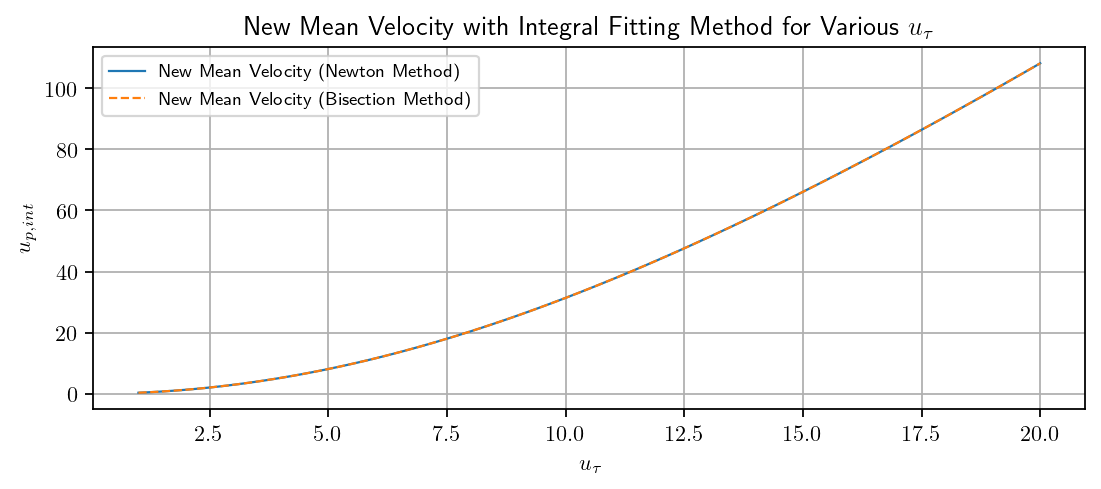

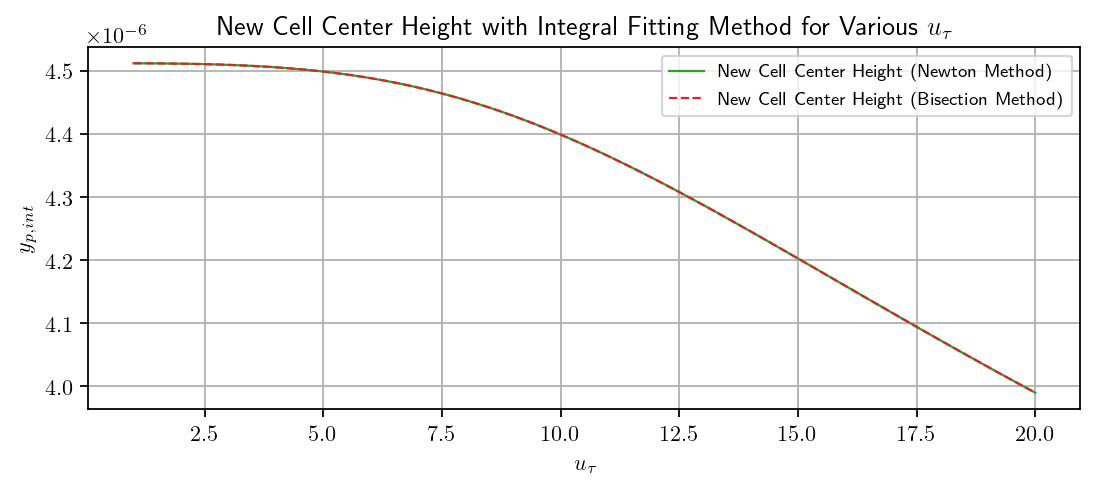

In [9]:
style2 = ["-", "--"]
lw2 = 1.0
# New mean velocity plot
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.grid()
ax3.set_xlabel(r"$u_\tau$")
ax3.set_ylabel(r'$u_{p,int}$')
plt.title(r"New Mean Velocity with Integral Fitting Method for Various $u_\tau$")
ax3.plot(u_tau_list, u_p_int_list, label = r'New Mean Velocity (Newton Method)', ls = style2[0], c = "C{:d}".format(0), lw = lw2)
ax3.plot(u_tau_list, u_p_int_list_bi, label = r'New Mean Velocity (Bisection Method)', ls = style2[1], c = "C{:d}".format(1), lw = lw2)
ax3.legend(fontsize = 8)
# New cell center height plot
fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.grid()
ax4.set_xlabel(r"$u_\tau$")
ax4.set_ylabel(r'$y_{p,int}$')
plt.title(r"New Cell Center Height with Integral Fitting Method for Various $u_\tau$")
ax4.plot(u_tau_list, y_p_int_list, label = r'New Cell Center Height (Newton Method)', ls = style2[0], c = "C{:d}".format(2), lw = lw2)
ax4.plot(u_tau_list, y_p_int_list_bi, label = r'New Cell Center Height (Bisection Method)', ls = style2[1], c = "C{:d}".format(3), lw = lw2)
ax4.legend(fontsize = 8)

## **6. Calculation of New Velocity for Different Number of Integral Points**

## 6-1. Newton's Method

In [10]:
# y+ = 1, cellcenter_y = 4.51172e-6
yf = 2*4.51172e-6

# Fixed u_tau and u
u_tau = 2
u = 20

# Different number of integral points from 5 to 25
num_points_list = [k for k in range(5, 26)]

# Sum of trapezoidal parts with vector initialization
trap_sum_list = np.zeros(len(num_points_list),)

# u for integral method with vector initialization
u_p_int_list = np.zeros(len(num_points_list),)

for j in range(len(num_points_list)):
    # Divide the cell height into the number of points
    y_list = np.linspace(0.0, yf, int(num_points_list[j])+1)    
    for i in range(num_points_list[j]):
        trap_sum_list[j] += velNewton(E, kappa, u, u_tau, y_list[i], nu) + velNewton(E, kappa, u, u_tau, y_list[i+1], nu)
    # u_p_int is the new cell center velocity by integral method.
    u_p_int_list[j] = 1/2*(1/num_points_list[j])*trap_sum_list[j]
    
print(u_p_int_list)

[1.29989243 1.29989865 1.29990241 1.29990486 1.29990654 1.29990774
 1.29990863 1.2999093  1.29990983 1.29991025 1.29991058 1.29991086
 1.29991109 1.29991128 1.29991144 1.29991158 1.2999117  1.2999118
 1.29991189 1.29991197 1.29991204]


## 6-2. Bisection Method

In [11]:
# Different number of integral points from 5 to 25
num_points_list_bi = [k for k in range(5, 26)]

# Sum of trapezoidal parts with vector initialization
trap_sum_list_bi = np.zeros(len(num_points_list_bi),)

# u for integral method with vector initialization
u_p_int_list_bi = np.zeros(len(num_points_list_bi),)

# Initial interval
a = 0
b = 1000

for j in range(len(num_points_list_bi)):
    # Divide the cell height into the number of points
    y_list_bi = np.linspace(0.0, yf, int(num_points_list_bi[j])+1)
    for i in range(num_points_list_bi[j]):
        trap_sum_list_bi[j] += velBisection(E, kappa, u_tau, y_list_bi[i], nu, a, b) + velBisection(E, kappa, u_tau, y_list_bi[i+1], nu, a, b)
    # u_p_int is the new cell center velocity by integral method.
    u_p_int_list_bi[j] = 1/2*(1/num_points_list_bi[j])*trap_sum_list_bi[j]
    
print(u_p_int_list_bi)

[1.29989243 1.29989866 1.29990241 1.29990486 1.29990654 1.29990774
 1.29990863 1.29990931 1.29990983 1.29991025 1.29991059 1.29991086
 1.29991109 1.29991128 1.29991145 1.29991158 1.2999117  1.2999118
 1.29991189 1.29991198 1.29991205]


## 6-3. Plot

According to the figure below, '*u_p_int*' value is consistent in terms of the number of integral points.

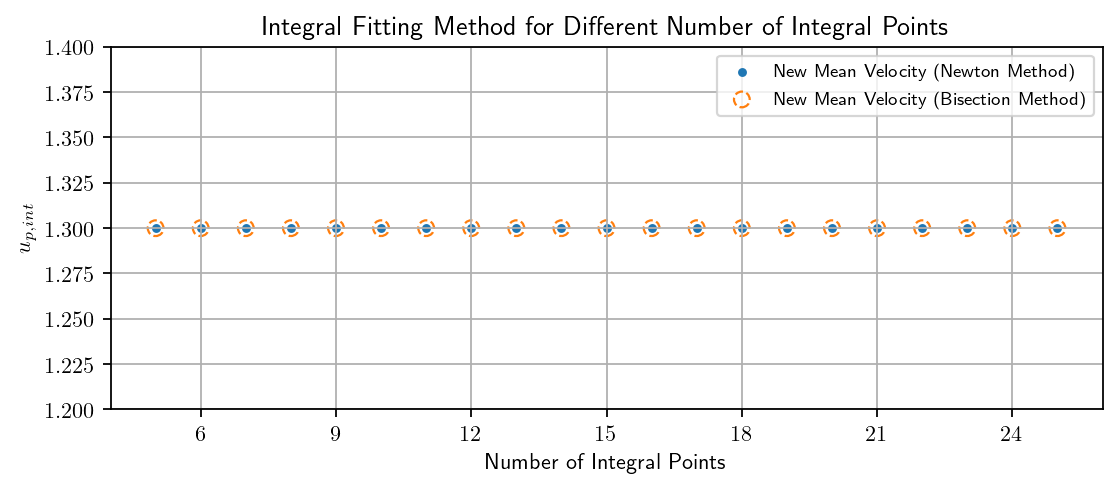

In [12]:
style3 = ["-", "--"]
lw3 = 1.0
# New mean velocity plot
fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([1.2, 1.4])
plt.grid()
ax4.set_xlabel("Number of Integral Points")
ax4.set_ylabel(r'$u_{p,int}$')
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(r"Integral Fitting Method for Different Number of Integral Points")
ax4.scatter(num_points_list, u_p_int_list, label = r'New Mean Velocity (Newton Method)', marker='.', ls = style3[0], c = "C{:d}".format(0), lw = lw3)
ax4.scatter(num_points_list_bi, u_p_int_list_bi, label = r'New Mean Velocity (Bisection Method)', s = 50, facecolors = 'none', edgecolors = "C{:d}".format(1), ls = style3[1], lw = lw3)
ax4.legend(fontsize = 8)

## **7. Calculation of New Velocity for Different Cell Heights and '*u_tau*'**

## 7-1. Newton's Method

In [13]:
# Various cell heights
yf_list = np.linspace(0.0, 1e-3, 100)

# Fixed velocity
u = 20

# New u_tau_list with linear space to plot continuous u_p_int and y_p_int
u_tau_list = np.linspace(1, 6, 6)

# Number of integral points
num_points = 10

# Sum of trapezoidal parts with vector initialization
trap_sum_list = np.zeros(len(u_tau_list)*len(yf_list),)
trap_sum_list = trap_sum_list.reshape(len(u_tau_list), len(yf_list))

# u for integral method with vector initialization
u_p_int_list = np.zeros(len(u_tau_list)*len(yf_list),)
u_p_int_list = u_p_int_list.reshape(len(u_tau_list), len(yf_list))

for k in range(len(yf_list)):
    # Divide the cell height into the number of points
    y_list = np.linspace(0.0, yf_list[k], num_points+1)
    for j in range(len(u_tau_list)):
        for i in range(num_points):
            trap_sum_list[j][k] += velNewton(E, kappa, u, u_tau_list[j], y_list[i], nu) + velNewton(E, kappa, u, u_tau_list[j], y_list[i+1], nu)
        # u_p_int is the new cell center velocity by integral method.
        u_p_int_list[j][k] = 1/2*(1/num_points)*trap_sum_list[j][k]

## 7-2. Bisection Method

In [14]:
# Number of integral points
num_points_bi = 10

# Sum of trapezoidal parts with vector initialization
trap_sum_list_bi = np.zeros(len(u_tau_list)*len(yf_list),)
trap_sum_list_bi = trap_sum_list_bi.reshape(len(u_tau_list), len(yf_list))

# u and y for integral method with vector initialization
u_p_int_list_bi = np.zeros(len(u_tau_list)*len(yf_list),)
u_p_int_list_bi = u_p_int_list_bi.reshape(len(u_tau_list), len(yf_list))

# Initial interval
a = 0
b = 1000

for k in range(len(yf_list)):
    # Divide the cell height into the number of points
    y_list = np.linspace(0.0, yf_list[k], num_points_bi+1)
    for j in range(len(u_tau_list)):
        for i in range(num_points_bi):
            trap_sum_list_bi[j][k] += velBisection(E, kappa, u_tau_list[j], y_list[i], nu, a, b) + velBisection(E, kappa, u_tau_list[j], y_list[i+1], nu, a, b)
        # u_p_int is the new cell center velocity by integral method.
        u_p_int_list_bi[j][k] = 1/2*(1/num_points_bi)*trap_sum_list_bi[j][k]

## 7-3. Plot

Basically, '*u_p_int*' (the integral based cell center velocity) and *u* (the distance based cell center velocity) are in a linear relation. Therefore, the behavior of '*u_p_int*' value for the various cell heights is very similar to that of the *u-y* relation graph.

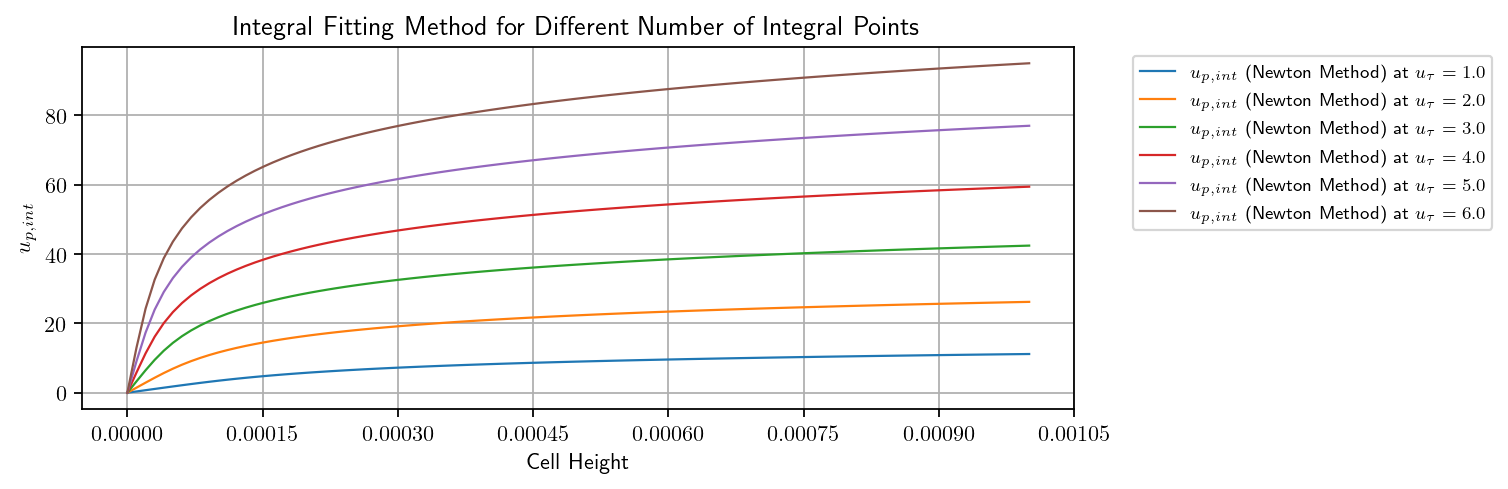

In [15]:
style4 = ["-", "--"]
lw4 = 1.0
# New mean velocity plot
fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))
plt.grid()
ax5.set_xlabel("Cell Height")
ax5.set_ylabel(r'$u_{p,int}$')
ax5.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(r"Integral Fitting Method for Different Number of Integral Points")
for j in range(len(u_tau_list)):    
    ax5.plot(yf_list, u_p_int_list[:][j], label = r'$u_{p,int}$ ' + r'(Newton Method) at $u_\tau = {:.1f}$'.format(u_tau_list[j]), ls = style4[0], c = "C{:d}".format(j), lw = lw4)
    ax5.legend(fontsize = 8, bbox_to_anchor=(1.05, 1))

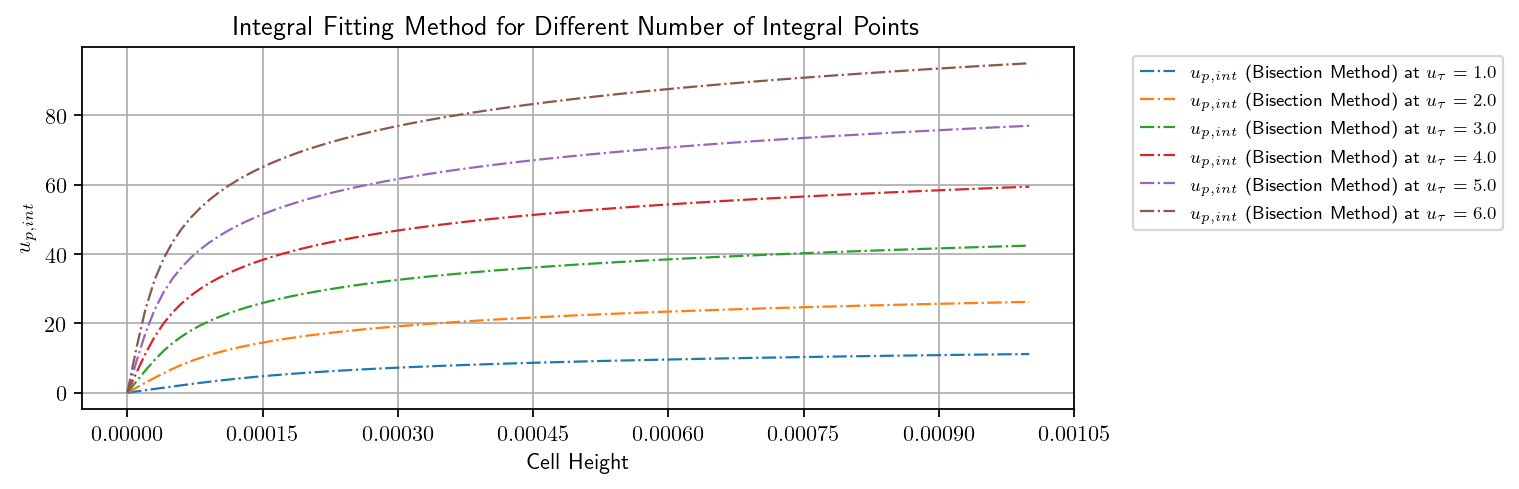

In [16]:
style5 = ["-", "-."]
lw5 = 1.0
# New mean velocity plot
fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))
plt.grid()
ax6.set_xlabel("Cell Height")
ax6.set_ylabel(r'$u_{p,int}$')
ax6.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(r"Integral Fitting Method for Different Number of Integral Points")
for j in range(len(u_tau_list)):    
    ax6.plot(yf_list, u_p_int_list_bi[:][j], label = r'$u_{p,int}$ ' + r'(Bisection Method) at $u_\tau = {:.1f}$'.format(u_tau_list[j]), ls = style5[1], c = "C{:d}".format(j), lw = lw5)
    ax6.legend(fontsize = 8, bbox_to_anchor=(1.05, 1))